In [1]:
#pip install rdflib
import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
import pandas as pd
import numpy as np
import seaborn as seaborn 
from collections import defaultdict , Counter

In [2]:
# create an empty Graph
g = rdflib.Graph()

# parse a local RDF file by specifying the format
result = g.parse("26102022output.ttl")

In [93]:
# useful functions
import json
def store_in_json(file_name, dictName): 
  with open(file_name, mode='w', encoding="utf-8") as jsonfile:
    json.dump(dictName, jsonfile)
    
import csv 
def store_csv(file_name, first_line, list_of_lists): 
    with open(file_name, mode='w', newline='', encoding='UTF-8') as my_file:
        file = csv.writer(my_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_ALL)
        file.writerow(first_line) 
        for l in list_of_lists: 
            file.writerow(l) 
    return(file_name)

In [ ]:
# Cultural phenomena in the dataset

In [ ]:
# count how many artworks have a certain phenomenon category and visualize it

In [10]:
cf_category_frequency = []
cq1 = '''
prefix data: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?CFBroaderLabel (count(distinct ?artwork) as ?tot) WHERE {
  ?iconol icon:aboutWorkOfArt ?artwork;
  icon:recognizedIntrinsicMeaning ?intrinsic.
  ?intrinsic icon:recognizedCulturalPhenomenon ?meaning.
  ?meaning a icon:CulturalPhenomenon; crm:P2_has_type ?CFBroader. 
  ?CFBroader rdfs:label ?CFBroaderLabel .
}
GROUP BY ?CFBroaderLabel 
ORDER BY DESC(?tot)
'''

cq1res = g.query(cq1)
for row in cq1res: 
    if str(row[0]) != "?": 
        cf_category_frequency.append([str(row[0]), int(row[1])])
    

In [11]:
df2 = pd.DataFrame(np.array(cf_category_frequency),
                   columns=['Cultural Phenomenon', 'Frequency'])
df2['Frequency'] = df2['Frequency'].astype(int)
result = df2.dtypes

print("Output:")
print(result)


Output:
Cultural Phenomenon    object
Frequency               int32
dtype: object


In [12]:
# df3 = df2.sort_values(by=['Frequency'], ascending=False)
df3 = df2.sort_index(ascending=False)
df3

Cultural Phenomenon  Frequency
20           Cultural interpretation          2
19                     Moral meaning          2
18       Iconographic interpretation          3
17                             Taste          3
16                            Humour          3
15                 Cultural movement          4
14                    Cultural value          7
13               Societal phenomenon         10
12                Cultural influence         14
11                          Attitude         15
10          Iconographical influence         15
9                Artist's expression         15
8          Cultural reinterpretation         17
7      Formal or stylistic influence         24
6                             Belief         30
5                           Tendency         39
4      Iconographical interpretation         51
3     Formal or stylistic phenomenon         61
2      Formal or stylistic evolution         89
1           Iconographical evolution        115
0   Reception of Classical antiquity        203

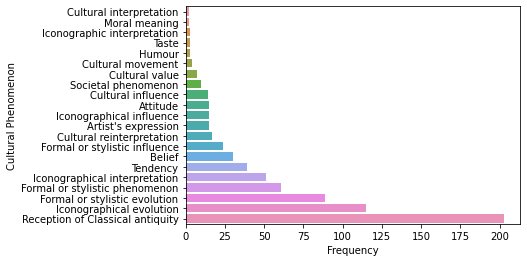

In [13]:
import seaborn as seaborn 
chart = seaborn.barplot(data=df3, x = 'Frequency', y='Cultural Phenomenon')

# Distribution of cultural phenomena

In [14]:
cq1 = '''
prefix data: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?meaning ?meaningLabel (count(distinct ?artwork) as ?tot) ?time WHERE {
  ?iconol icon:aboutWorkOfArt ?artwork;
  icon:recognizedIntrinsicMeaning ?intrinsic.
  ?intrinsic (icon:recognizedConceptualObject | icon:recognizedCulturalPhenomenon) ?meaning.
  ?meaning a icon:CulturalPhenomenon; rdfs:label ?meaningLabel .
  OPTIONAL {?cultObj crm:P65_shows_visual_item ?artwork.
          ?production crm:P108_has_produced ?cultObj;
          crm:P4_has_time_span ?time}
}
GROUP BY ?meaning 
ORDER BY DESC(?tot)
'''

cq1res = g.query(cq1)

# create a list with phenomena that appear in at least 5 artworks
well_represented_phenomena = []
well_represented_phenomena_and_counts = []
for row in cq1res:
  if int(row[2]) >= 9:
    well_represented_phenomena.append("<"+str(row[0])+">")
    well_represented_phenomena_and_counts.append((str(row[0]), row[2]))
    print(row[2], '-',row[1])

26 - Representation of classical content with contemporary formal motifs
23 - Renascences of classical antiquity in Western Art before the Renaissance
13 - Reintegration of classical style and content in the Italian Renaissance
12 - Iconographic evolution of classical subjects
12 - Iconographic evolution of the representation of the three-headed companion of Serapis
11 - Classical motifs recovery
10 - Classical subject matter represented in classical form
10 - The phenomenon called Principle of disjunction: whenever in the high and later Middle Ages a work of art borrows its form from a classical model, this form is almost invariably invested with a non-classical, normally Christian, significance; whenever in the high and later Middle Ages a work of art borrows its theme from classical poetry, legend, history or mythology, this theme is quite invariably presented in a non-classical, normally contemporary, form.
9 - Intrinsic classicism was created by the meeting of Gothic and Proto-Ren

Notes: they are a lot, which is ok. I'm wondering if some can be generalized, e.g. an artwork that exemplifies "Iconographic evolution of nudity" can also exemplify "Iconographic evolution of classical subjects". If so, can the artwork be associated to both phenomena?

In [15]:
# same query with general categories

cq1 = '''
prefix data: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?CFbroader ?CFbroaderLabel (count(distinct ?artwork) as ?tot) ?time WHERE {
  ?iconol icon:aboutWorkOfArt ?artwork;
  icon:recognizedIntrinsicMeaning ?intrinsic.
  ?intrinsic icon:recognizedCulturalPhenomenon ?meaning.
  ?meaning a icon:CulturalPhenomenon; crm:P2_has_type ?CFbroader. 
?CFbroader rdfs:label ?CFbroaderLabel.
  OPTIONAL {?cultObj crm:P65_shows_visual_item ?artwork.
          ?production crm:P108_has_produced ?cultObj;
          crm:P4_has_time_span ?time}
}
GROUP BY ?CFbroader 
ORDER BY DESC(?tot)
'''

cq1res = g.query(cq1)

# create a list with phenomena that appear in at least 5 artworks
well_represented_phenomena = []
well_represented_phenomena_and_counts = []
for row in cq1res:
  if int(row[2]) >= 9:
    well_represented_phenomena.append("<"+str(row[0])+">")
    well_represented_phenomena_and_counts.append((str(row[0]), row[2]))
    print(row[2], '-',row[1])

203 - Reception of Classical antiquity
115 - Iconographical evolution
89 - Formal or stylistic evolution
61 - Formal or stylistic phenomenon
51 - Iconographical interpretation
39 - Tendency
30 - Belief
24 - Formal or stylistic influence
17 - Cultural reinterpretation
15 - Artist's expression
15 - Iconographical influence
15 - Attitude
14 - Cultural influence
10 - Societal phenomenon


In [16]:
well_represented_phenomena = ['<http://icondataset.org/reception-of-classical-antiquity>',
'<http://icondataset.org/iconographical-evolution>',
 '<http://icondataset.org/formal-or-stylistic-evolution>',
 '<http://icondataset.org/formal-or-stylistic-phenomenon>',
 '<http://icondataset.org/iconographical-interpretation>',
 '<http://icondataset.org/tendency>',
 '<http://icondataset.org/belief>',
 '<http://icondataset.org/formal-or-stylistic-influence>',
 '<http://icondataset.org/cultural-reinterpretation>',
 '<http://icondataset.org/artists-expression>',
 '<http://icondataset.org/iconographical-influence>',
 '<http://icondataset.org/attitude>',
 '<http://icondataset.org/cultural-influence>',
 '<http://icondataset.org/societal-phenomenon>']

['<http://icondataset.org/reception-of-classical-antiquity>',
 '<http://icondataset.org/iconographical-evolution>',
 '<http://icondataset.org/formal-or-stylistic-evolution>',
 '<http://icondataset.org/formal-or-stylistic-phenomenon>',
 '<http://icondataset.org/iconographical-interpretation>',
 '<http://icondataset.org/tendency>',
 '<http://icondataset.org/belief>',
 '<http://icondataset.org/formal-or-stylistic-influence>',
 '<http://icondataset.org/cultural-reinterpretation>',
 '<http://icondataset.org/artists-expression>',
 '<http://icondataset.org/iconographical-influence>',
 '<http://icondataset.org/attitude>',
 '<http://icondataset.org/cultural-influence>',
 '<http://icondataset.org/societal-phenomenon>']

# Subjects of well represented phenomena

Level 2 subjects associated to the most well represented cultural phenomena

In [6]:
cq2 = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?meaning ?artwork ?subj2  WHERE {
  VALUES ?rel {icon:hasCharacter icon:hasEvent icon:hasNamedObject icon:hasPlace icon:hasPersonification icon:hasSymbol}
  VALUES ?meaning { """+ ' '.join(well_represented_phenomena) +"""}
  ?meaning ^icon:recognizedCulturalPhenomenon / ^icon:recognizedIntrinsicMeaning ?iconol .
  ?iconol icon:aboutWorkOfArt ?artwork .
  ?icrec icon:aboutWorkOfArt ?artwork; 
          a icon:IconographicalRecognition;
          icon:recognizedImage ?image.
  
  ?image ?rel ?subj2. 

  #OPTIONAL {
  #  ?icrec icon:aboutWorkOfArt ?artwork;
  #  a icon:IconographicalRecognition; icon:recognizedInvenzione ?subj2.
  #}

} 
""" 

cq2res = g.query(cq2)
#for row in cq2res:
#  print(row[0], '-',row[2], " -- meaning:", row[1])

In [ ]:
# same, takng cultural phenomena typologies


In [7]:
cq2 = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?CFbroader ?CFbroaderLabel ?artwork ?subj2  WHERE {
  VALUES ?rel {icon:hasCharacter icon:hasEvent icon:hasNamedObject icon:hasPlace icon:hasPersonification icon:hasSymbol}
  VALUES ?CFbroader { """+ ' '.join(well_represented_phenomena) +"""}
  ?CFbroader ^crm:P2_has_type ?meaning.
  ?meaning ^icon:recognizedCulturalPhenomenon / ^icon:recognizedIntrinsicMeaning ?iconol .
  ?iconol icon:aboutWorkOfArt ?artwork .
  ?icrec icon:aboutWorkOfArt ?artwork; 
          a icon:IconographicalRecognition;
          icon:recognizedImage ?image.
 
  ?CFbroader rdfs:label ?CFbroaderLabel. 
  ?image ?rel ?subj2. 

  #OPTIONAL {
  #  ?icrec icon:aboutWorkOfArt ?artwork;
  #  a icon:IconographicalRecognition; icon:recognizedInvenzione ?subj2.
  #}

} 
""" 

cq2res = g.query(cq2)
for row in cq2res:
  print(row[0], '-',row[3], " -- meaning:", row[1])

http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/argus  -- meaning: Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/vulcan  -- meaning: Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/the-three-graces  -- meaning: Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/silenus  -- meaning: Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/pygmalion  -- meaning: Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/archangel-gabriel  -- meaning: Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/venus  -- meaning: Reception of Classical antiquity
http://icondataset.org/reception-of-cla

http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/the-three-graces  -- meaning: Formal or stylistic evolution
http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/centaur  -- meaning: Formal or stylistic evolution
http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/centaur  -- meaning: Formal or stylistic evolution
http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/prometheus  -- meaning: Formal or stylistic evolution
http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/vulcan  -- meaning: Formal or stylistic evolution
http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/polyxena  -- meaning: Formal or stylistic evolution
http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/jupiter  -- meaning: Formal or stylistic evolution
http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/mercury

http://icondataset.org/tendency - http://icondataset.org/christ-as-a-child  -- meaning: Tendency
http://icondataset.org/tendency - http://icondataset.org/leach  -- meaning: Tendency
http://icondataset.org/tendency - http://icondataset.org/aeolus  -- meaning: Tendency
http://icondataset.org/belief - http://icondataset.org/moses  -- meaning: Belief
http://icondataset.org/belief - http://icondataset.org/aeolus  -- meaning: Belief
http://icondataset.org/belief - http://icondataset.org/mercury  -- meaning: Belief
http://icondataset.org/belief - http://icondataset.org/angels  -- meaning: Belief
http://icondataset.org/belief - http://icondataset.org/nymphs  -- meaning: Belief
http://icondataset.org/belief - http://icondataset.org/centaur  -- meaning: Belief
http://icondataset.org/belief - http://icondataset.org/centaur  -- meaning: Belief
http://icondataset.org/belief - http://icondataset.org/satyr  -- meaning: Belief
http://icondataset.org/belief - http://icondataset.org/the-three-graces  --

http://icondataset.org/attitude - http://icondataset.org/cupid  -- meaning: Attitude
http://icondataset.org/attitude - http://icondataset.org/europa  -- meaning: Attitude
http://icondataset.org/attitude - http://icondataset.org/roman-emperors  -- meaning: Attitude
http://icondataset.org/attitude - http://icondataset.org/planetary-deities  -- meaning: Attitude
http://icondataset.org/cultural-influence - http://icondataset.org/hecuba  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/cupid  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/troilus  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/mary  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/saints  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/moses  -- meaning: Cultural influence
http:

http://icondataset.org/iconographical-interpretation - http://icondataset.org/tantalus-vainly-reaching-for-the-water  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/the-nymphs-help-vulcan-precipitated-from-mount-olympus-onto-the-island-of-lemnos  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/the-age-of-stone  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/era-ante-vulcanum  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/saturn-devouring-a-living-child  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/saturn-devouring-a-living-child  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - 

http://icondataset.org/societal-phenomenon - http://icondataset.org/era-sub-vulcano  -- meaning: societal phenomenon
http://icondataset.org/societal-phenomenon - http://icondataset.org/faith-has-the-world-under-her-feet  -- meaning: societal phenomenon
http://icondataset.org/societal-phenomenon - http://icondataset.org/eros-and-anteros-fishing-for-hearts  -- meaning: Societal phenomenon
http://icondataset.org/societal-phenomenon - http://icondataset.org/the-age-of-metal  -- meaning: Societal phenomenon
http://icondataset.org/societal-phenomenon - http://icondataset.org/aeolus-seals-the-naughty-winds-into-the-wine-skins  -- meaning: Societal phenomenon
http://icondataset.org/societal-phenomenon - http://icondataset.org/vulcan-with-his-helpers-are-already-at-work-in-mid-career-of-night-when-ordinary-people-are-still-asleep  -- meaning: Societal phenomenon
http://icondataset.org/societal-phenomenon - http://icondataset.org/aeolus-working-two-blacksmiths-bellows  -- meaning: societal pheno

http://icondataset.org/iconographical-influence - http://icondataset.org/lion-zodiacal-sign  -- meaning: Iconographical influence
http://icondataset.org/iconographical-influence - http://icondataset.org/imperial-orb  -- meaning: Iconographical influence
http://icondataset.org/iconographical-influence - http://icondataset.org/lion-zodiacal-sign  -- meaning: Iconographical influence
http://icondataset.org/iconographical-influence - http://icondataset.org/algol-head-of-demon  -- meaning: Iconographical influence
http://icondataset.org/attitude - http://icondataset.org/the-tomb-of-king-ninus  -- meaning: Attitude
http://icondataset.org/cultural-influence - http://icondataset.org/lion-zodiacal-sign  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/algol-head-of-demon  -- meaning: Cultural influence
http://icondataset.org/societal-phenomenon - http://icondataset.org/altar  -- meaning: Societal phenomenon
http://icondataset.org/societal-phenome

http://icondataset.org/formal-or-stylistic-phenomenon - http://icondataset.org/atlas  -- meaning: Formal or stylistic phenomenon
http://icondataset.org/iconographical-interpretation - http://icondataset.org/futile-and-treacherous-pleasure  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/voluptas  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/time-the-revealer  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/contemplative-mind  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/time-the-destroyer  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/time-ripa  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-

http://icondataset.org/attitude - http://icondataset.org/chastity  -- meaning: Attitude
http://icondataset.org/attitude - http://icondataset.org/the-constellation-hercules  -- meaning: Attitude
http://icondataset.org/cultural-influence - http://icondataset.org/time-the-revealer  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/victories  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/the-constellation-hercules  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/the-twins-constellation  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/the-constellation-perseus  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/fraude  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/pleasure  -- meaning: Cultural in

http://icondataset.org/formal-or-stylistic-phenomenon - http://icondataset.org/temple-of-solomon-ornate-as-a-church-correlation-between-the-old-testament-and-the-new  -- meaning: Formal or stylistic phenomenon
http://icondataset.org/formal-or-stylistic-phenomenon - http://icondataset.org/urns-pagan-custom-of-cremation  -- meaning: Formal or stylistic phenomenon
http://icondataset.org/formal-or-stylistic-phenomenon - http://icondataset.org/tombs-christian-rite-of-burial  -- meaning: Formal or stylistic phenomenon
http://icondataset.org/iconographical-interpretation - http://icondataset.org/tantalus-avarice  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/branches-of-a-tree-antidotes-against-sexual-passion-marriage-prayer-business-abstinence  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/wolf-greed  -- meaning: Iconographical interpretation
htt

http://icondataset.org/iconographical-influence - http://icondataset.org/two-graces-facing-the-observer-favor-returned-twofold  -- meaning: Iconographical influence
http://icondataset.org/iconographical-influence - http://icondataset.org/the-grace-turning-his-back-favor-conferred  -- meaning: Iconographical influence
http://icondataset.org/attitude - http://icondataset.org/bull-christ  -- meaning: Attitude
http://icondataset.org/attitude - http://icondataset.org/europa-human-soul  -- meaning: Attitude
http://icondataset.org/cultural-influence - http://icondataset.org/sitting-down-on-a-lion-quando-est-in-leone  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/pillow-idleness-and-lechery  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/a-pair-of-masks-one-of-a-young-woman-the-other-of-a-old-malevolent-man-worldliness-insincerity-falsehood  -- meaning: Cultural influence
http://icondataset.o

In [8]:
from collections import defaultdict , Counter

meanings_subjects = defaultdict(list)
# ?meaning ?artwork ?subj2
for row in cq2res:
  meanings_subjects[str(row['CFbroader'])].append(str(row['subj2']))

meanings_subjects_with_counts = {}
for k,v in meanings_subjects.items():
  for m,c in well_represented_phenomena_and_counts:
    if k == m:
      meanings_subjects_with_counts[k+" ("+c+")"] = dict(Counter(v).most_common())

# add count

meanings_subjects_with_counts

{'http://icondataset.org/reception-of-classical-antiquity (203)': {'http://icondataset.org/saturn': 16,
  'http://icondataset.org/cupid': 14,
  'http://icondataset.org/mercury': 11,
  'http://icondataset.org/venus': 8,
  'http://icondataset.org/apollo': 8,
  'http://icondataset.org/jupiter': 8,
  'http://icondataset.org/companion-of-serapis': 7,
  'http://icondataset.org/the-constellation-hercules': 6,
  'http://icondataset.org/blindfold-cupid': 5,
  'http://icondataset.org/saturn-devouring-a-living-child': 5,
  'http://icondataset.org/caduceus': 5,
  'http://icondataset.org/the-three-graces': 4,
  'http://icondataset.org/pluto': 4,
  'http://icondataset.org/mary': 4,
  'http://icondataset.org/bacchus': 4,
  'http://icondataset.org/satyr': 4,
  'http://icondataset.org/people/virgil': 4,
  'http://icondataset.org/era-sub-vulcano': 4,
  'http://icondataset.org/death': 4,
  'http://icondataset.org/vulcan': 3,
  'http://icondataset.org/silenus': 3,
  'http://icondataset.org/centaur': 3,
  

In [23]:
frequent_subj_per_cf = {}
for item in meanings_subjects_with_counts.items():
    for pair in item[1].items(): 
        if int(pair[1]) >= 10:
            print(item[0], pair)
           # if item[0] not in frequent_subj_per_cf:
            #    frequent_subj_per_cf[item[0]] = {pair}
           # else: 
                
      

http://icondataset.org/reception-of-classical-antiquity (203) ('http://icondataset.org/saturn', 16)
http://icondataset.org/reception-of-classical-antiquity (203) ('http://icondataset.org/cupid', 14)
http://icondataset.org/reception-of-classical-antiquity (203) ('http://icondataset.org/mercury', 11)
http://icondataset.org/iconographical-evolution (115) ('http://icondataset.org/saturn', 16)
http://icondataset.org/iconographical-evolution (115) ('http://icondataset.org/cupid', 14)
http://icondataset.org/iconographical-interpretation (51) ('http://icondataset.org/cupid', 10)


Result analysis. They are all classical deities. In fact, nearly half on the phenomena are about the reception of classical antiquity. Maybe we can see how classical subjects evolve over time. 

|CF | CF frequency | lev 2 | lev 2 frequency |percentage of lev 2 in cf|
|---|--------------|-------|------------------|----|
|reception of classical antiquity |203 | cupid | 14| 7% |
|reception of classical antiquity |203 | mercury | 11| 5% |
|iconographical evolution |115| saturn | 16| 14% |
|iconographical evolution |115| cupid | 14| 12% |
|iconographical interpretation |51| cupid| 10| 20% |


Spontaneous question: which are the main "areas" (e.g. classical antiquity, christianity) in the dataset? how much are they represented? 

In [32]:
frequent_subj_per_cf = {}
for item in meanings_subjects_with_counts.items():
    for pair in item[1].items(): 
        if int(pair[1]) >= 5:
            print(item[0], pair)
           # if item[0] not in frequent_subj_per_cf:
            #    frequent_subj_per_cf[item[0]] = {pair}
           # else: 
                
      

http://icondataset.org/reception-of-classical-antiquity (203) ('http://icondataset.org/saturn', 16)
http://icondataset.org/reception-of-classical-antiquity (203) ('http://icondataset.org/cupid', 14)
http://icondataset.org/reception-of-classical-antiquity (203) ('http://icondataset.org/mercury', 11)
http://icondataset.org/reception-of-classical-antiquity (203) ('http://icondataset.org/venus', 8)
http://icondataset.org/reception-of-classical-antiquity (203) ('http://icondataset.org/apollo', 8)
http://icondataset.org/reception-of-classical-antiquity (203) ('http://icondataset.org/jupiter', 8)
http://icondataset.org/reception-of-classical-antiquity (203) ('http://icondataset.org/companion-of-serapis', 7)
http://icondataset.org/reception-of-classical-antiquity (203) ('http://icondataset.org/the-constellation-hercules', 6)
http://icondataset.org/reception-of-classical-antiquity (203) ('http://icondataset.org/blindfold-cupid', 5)
http://icondataset.org/reception-of-classical-antiquity (203) (

In [40]:
meanings_subjects_with_counts

{'http://icondataset.org/reception-of-classical-antiquity (203)': {'http://icondataset.org/saturn': 16,
  'http://icondataset.org/cupid': 14,
  'http://icondataset.org/mercury': 11,
  'http://icondataset.org/venus': 8,
  'http://icondataset.org/apollo': 8,
  'http://icondataset.org/jupiter': 8,
  'http://icondataset.org/companion-of-serapis': 7,
  'http://icondataset.org/the-constellation-hercules': 6,
  'http://icondataset.org/blindfold-cupid': 5,
  'http://icondataset.org/saturn-devouring-a-living-child': 5,
  'http://icondataset.org/caduceus': 5,
  'http://icondataset.org/the-three-graces': 4,
  'http://icondataset.org/pluto': 4,
  'http://icondataset.org/mary': 4,
  'http://icondataset.org/bacchus': 4,
  'http://icondataset.org/satyr': 4,
  'http://icondataset.org/people/virgil': 4,
  'http://icondataset.org/era-sub-vulcano': 4,
  'http://icondataset.org/death': 4,
  'http://icondataset.org/vulcan': 3,
  'http://icondataset.org/silenus': 3,
  'http://icondataset.org/centaur': 3,
  

In [44]:
# tpo 10 most frequent subjects per cf
top_5_subj_per_cf = {}
for item in meanings_subjects_with_counts.items():
    if item[0] not in top_5_subj_per_cf:
        top_5_subj_per_cf[item[0]] = {}
        for pair in item[1].items(): 
            if len(top_5_subj_per_cf[item[0]]) < 5:
                top_5_subj_per_cf[item[0]][pair[0]] = pair[1]
               
top_5_subj_per_cf   

{'http://icondataset.org/reception-of-classical-antiquity (203)': {'http://icondataset.org/saturn': 16,
  'http://icondataset.org/cupid': 14,
  'http://icondataset.org/mercury': 11,
  'http://icondataset.org/venus': 8,
  'http://icondataset.org/apollo': 8},
 'http://icondataset.org/iconographical-evolution (115)': {'http://icondataset.org/saturn': 16,
  'http://icondataset.org/cupid': 14,
  'http://icondataset.org/companion-of-serapis': 8,
  'http://icondataset.org/blindfold-cupid': 6,
  'http://icondataset.org/apollo': 6},
 'http://icondataset.org/formal-or-stylistic-evolution (87)': {'http://icondataset.org/mercury': 8,
  'http://icondataset.org/era-sub-vulcano': 4,
  'http://icondataset.org/satyr': 3,
  'http://icondataset.org/saturn': 3,
  'http://icondataset.org/apollo': 3},
 'http://icondataset.org/formal-or-stylistic-phenomenon (59)': {'http://icondataset.org/mary': 2,
  'http://icondataset.org/christ': 2,
  'http://icondataset.org/archangel-gabriel': 1,
  'http://icondataset.or

In [17]:
# experiment 1. correlation of cf-level2 subj . lists too long, memory error
final_lists = []
for k,v in meanings_subjects.items(): 
        l = v
        final_lists.append(l)

In [18]:
print(final_lists)

[['http://icondataset.org/argus', 'http://icondataset.org/vulcan', 'http://icondataset.org/the-three-graces', 'http://icondataset.org/silenus', 'http://icondataset.org/pygmalion', 'http://icondataset.org/archangel-gabriel', 'http://icondataset.org/venus', 'http://icondataset.org/thisbe', 'http://icondataset.org/cupid', 'http://icondataset.org/ganymede', 'http://icondataset.org/saturn', 'http://icondataset.org/vulcan', 'http://icondataset.org/cupid', 'http://icondataset.org/marine-snakes', 'http://icondataset.org/mercury', 'http://icondataset.org/mercury', 'http://icondataset.org/troilus', 'http://icondataset.org/blindfold-cupid', 'http://icondataset.org/companion-of-serapis', 'http://icondataset.org/pluto', 'http://icondataset.org/sisyphus', 'http://icondataset.org/apollo', 'http://icondataset.org/mary', 'http://icondataset.org/blindfold-cupid', 'http://icondataset.org/muses', 'http://icondataset.org/natural-venus', 'http://icondataset.org/paris', 'http://icondataset.org/saturn', 'http

In [20]:

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import pandas as pd


dataset = final_lists

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.15, use_colnames=True)
frequent_itemsets

MemoryError: cannot allocate array memory

In [3]:
# same, with categories of subjects


cq2 = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>
prefix skos: <http://www.w3.org/2004/02/skos/core#>

SELECT DISTINCT ?CFbroader ?CFbroaderLabel ?artwork ?subj2 ?subj2Broader WHERE {
  VALUES ?rel {icon:hasCharacter icon:hasEvent icon:hasNamedObject icon:hasPlace icon:hasPersonification icon:hasSymbol}
  VALUES ?CFbroader { """+ ' '.join(well_represented_phenomena) +"""}
  ?CFbroader ^crm:P2_has_type ?meaning.
  ?meaning ^icon:recognizedCulturalPhenomenon / ^icon:recognizedIntrinsicMeaning ?iconol .
  ?iconol icon:aboutWorkOfArt ?artwork .
  ?icrec icon:aboutWorkOfArt ?artwork; 
          a icon:IconographicalRecognition; 
          icon:recognizedImage ?image. 
  ?CFbroader rdfs:label ?CFbroaderLabel. 
  ?image ?rel ?subj2. 

  OPTIONAL {?subj2 skos:broader ?subj2Broader }
  OPTIONAL {?invenzione skos:broader ?invenzioneBroader }

} 
""" 

cq2res = g.query(cq2)
for row in cq2res:
  print(row[0], '-',row[3], "has broader subject: ", row[4], " -- meaning:", row[1])

NameError: name 'well_represented_phenomena' is not defined

Notes: there are too many subjects to see a pattern, I'd try to group them by type, manually, in a second iteration? e.g. greek gods, places, mythological figures, landscape, and so on.

Question: is it possible that you have many artworks without subjects of level 2? Look for instance at http://icondataset.org/CF1327, which is associated to 10 artworks, but all subjects appear in one artwork only. Answer: they appear in all the artworks only once. 

You can use the same method to query subjects of level 1.

# cultural phenomena correlation with stories and allegories

In [18]:
# same, with categories of subjects


cq2 = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>
prefix skos: <http://www.w3.org/2004/02/skos/core#>

SELECT DISTINCT ?CFbroader ?CFbroaderLabel ?artwork ?invenzione ?invenzioneBroader ?type WHERE {
  VALUES ?rel {icon:hasCharacter icon:hasEvent icon:hasNamedObject icon:hasPlace icon:hasPersonification icon:hasSymbol}
  VALUES ?CFbroader { """+ ' '.join(well_represented_phenomena) +"""}
  ?CFbroader ^crm:P2_has_type ?meaning; rdfs:label ?CFbroaderLabel. 
  ?meaning ^icon:recognizedCulturalPhenomenon / ^icon:recognizedIntrinsicMeaning ?iconol .
  ?iconol icon:aboutWorkOfArt ?artwork .
  ?icrec icon:aboutWorkOfArt ?artwork; 
          a icon:IconographicalRecognition; 
          icon:recognizedInvenzione ?invenzione. 
  ?invenzione rdfs:label ?invenzioneLabel; a ?type. 

  OPTIONAL {?invenzione skos:broader ?invenzioneBroader }
  OPTIONAL {?invenzione skos:broader ?invenzioneBroader. ?invenzioneBroader  rdfs:label ?invenzioneBroaderLabel }

} 
""" 

cq2res = g.query(cq2)
for row in cq2res:
  #print(row)  
    print(row[0], '-',row[3],"has type: ", row[5], "has broader: ", row[4], " -- meaning:", row[1])
    if row[4] != "None": 
        inv = row[4]
    else: 
        inv = row[3]
    

http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/perseus-and-medusa has type:  https://w3id.org/icon/ontology/Story has broader:  http://icondataset.org/classical-mythology-and-ancient-history  -- meaning: Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/perseus-and-medusa has type:  https://w3id.org/icon/ontology/Story has broader:  http://icondataset.org/story-of-perseus  -- meaning: Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/the-abduction-of-europa has type:  https://w3id.org/icon/ontology/Event has broader:  http://icondataset.org/classical-mythology-and-ancient-history  -- meaning: Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/the-abduction-of-europa has type:  https://w3id.org/icon/ontology/Event has broader:  http://icondataset.org/love-affairs-of

http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/the-abduction-of-europa has type:  https://w3id.org/icon/ontology/Story has broader:  http://icondataset.org/love-affairs-of-jupiter  -- meaning: Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/allegorical-explanation-of-the-the-three-graces-position has type:  https://w3id.org/icon/ontology/Allegory has broader:  None  -- meaning: Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/the-story-of-laocoon-and-his-sons has type:  https://w3id.org/icon/ontology/Story has broader:  http://icondataset.org/classical-mythology-and-ancient-history  -- meaning: Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/the-annunciation has type:  https://w3id.org/icon/ontology/Story has broader:  http://icondataset.org/bible  -- meaning

http://icondataset.org/iconographical-evolution - http://icondataset.org/the-abduction-of-europa has type:  https://w3id.org/icon/ontology/Event has broader:  http://icondataset.org/classical-mythology-and-ancient-history  -- meaning: Iconographical evolution
http://icondataset.org/iconographical-evolution - http://icondataset.org/the-abduction-of-europa has type:  https://w3id.org/icon/ontology/Event has broader:  http://icondataset.org/love-affairs-of-jupiter  -- meaning: Iconographical evolution
http://icondataset.org/iconographical-evolution - http://icondataset.org/saturn-devouring-the-stone has type:  https://w3id.org/icon/ontology/Story has broader:  http://icondataset.org/classical-mythology-and-ancient-history  -- meaning: Iconographical evolution
http://icondataset.org/iconographical-evolution - http://icondataset.org/saturn-devouring-the-stone has type:  https://w3id.org/icon/ontology/Story has broader:  http://icondataset.org/story-of-saturn  -- meaning: Iconographical evol

http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/the-rape-of-proserpina has type:  https://w3id.org/icon/ontology/Story has broader:  http://icondataset.org/classical-mythology-and-ancient-history  -- meaning: Formal or stylistic evolution
http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/the-rape-of-proserpina has type:  https://w3id.org/icon/ontology/Story has broader:  http://icondataset.org/love-affairs-of-pluto  -- meaning: Formal or stylistic evolution
http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/bacchus-discovers-the-honey has type:  https://w3id.org/icon/ontology/Story has broader:  http://icondataset.org/classical-mythology-and-ancient-history  -- meaning: Formal or stylistic evolution
http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/bacchus-discovers-the-honey has type:  https://w3id.org/icon/ontology/Story has broader:  http://icondataset.org/story-of-bacchu

http://icondataset.org/formal-or-stylistic-phenomenon - http://icondataset.org/the-abduction-of-europa has type:  https://w3id.org/icon/ontology/Event has broader:  http://icondataset.org/love-affairs-of-jupiter  -- meaning: Formal or stylistic phenomenon
http://icondataset.org/formal-or-stylistic-phenomenon - http://icondataset.org/abduction-of-helen has type:  https://w3id.org/icon/ontology/Story has broader:  http://icondataset.org/classical-mythology-and-ancient-history  -- meaning: Formal or stylistic phenomenon
http://icondataset.org/formal-or-stylistic-phenomenon - http://icondataset.org/the-vision-of-the-magi has type:  https://w3id.org/icon/ontology/Story has broader:  http://icondataset.org/bible  -- meaning: Formal or stylistic phenomenon
http://icondataset.org/formal-or-stylistic-phenomenon - http://icondataset.org/the-vision-of-the-magi has type:  https://w3id.org/icon/ontology/Story has broader:  http://icondataset.org/the-story-of-the-magi  -- meaning: Formal or stylisti

http://icondataset.org/tendency - http://icondataset.org/the-abduction-of-europa has type:  https://w3id.org/icon/ontology/Story has broader:  http://icondataset.org/love-affairs-of-jupiter  -- meaning: Tendency
http://icondataset.org/tendency - http://icondataset.org/bacchus-discovers-the-honey has type:  https://w3id.org/icon/ontology/Story has broader:  http://icondataset.org/classical-mythology-and-ancient-history  -- meaning: Tendency
http://icondataset.org/tendency - http://icondataset.org/bacchus-discovers-the-honey has type:  https://w3id.org/icon/ontology/Story has broader:  http://icondataset.org/story-of-bacchus  -- meaning: Tendency
http://icondataset.org/tendency - http://icondataset.org/the-visitation has type:  https://w3id.org/icon/ontology/Story has broader:  http://icondataset.org/bible  -- meaning: Tendency
http://icondataset.org/tendency - http://icondataset.org/the-visitation has type:  https://w3id.org/icon/ontology/Story has broader:  http://icondataset.org/the-a

http://icondataset.org/iconographical-influence - http://icondataset.org/allegory-of-sun has type:  https://w3id.org/icon/ontology/Allegory has broader:  None  -- meaning: Iconographical influence
http://icondataset.org/attitude - http://icondataset.org/the-abduction-of-europa has type:  https://w3id.org/icon/ontology/Event has broader:  http://icondataset.org/classical-mythology-and-ancient-history  -- meaning: Attitude
http://icondataset.org/attitude - http://icondataset.org/the-abduction-of-europa has type:  https://w3id.org/icon/ontology/Event has broader:  http://icondataset.org/love-affairs-of-jupiter  -- meaning: Attitude
http://icondataset.org/attitude - http://icondataset.org/the-abduction-of-europa-as-allegory-of-christ-saving-the-human-soul has type:  https://w3id.org/icon/ontology/Allegory has broader:  None  -- meaning: Attitude
http://icondataset.org/attitude - http://icondataset.org/the-abduction-of-europa has type:  https://w3id.org/icon/ontology/Story has broader:  htt

In [19]:
from collections import defaultdict , Counter

meanings_inv = defaultdict(list)
# ?meaning ?artwork ?subj2
for row in cq2res:
    if row[4] == None: 
        inv = str(row[3])
    else: 
        inv = (row[4])
    meanings_inv[str(row['CFbroader'])].append(inv)

meanings_inv_with_counts = {}
for k,v in meanings_inv.items():
  for m,c in well_represented_phenomena_and_counts:
    if k == m:
      meanings_inv_with_counts[k+" ("+c+")"] = dict(Counter(v).most_common())

# add count

meanings_inv_with_counts

{'http://icondataset.org/reception-of-classical-antiquity (203)': {rdflib.term.URIRef('http://icondataset.org/classical-mythology-and-ancient-history'): 22,
  rdflib.term.URIRef('http://icondataset.org/story-of-saturn'): 6,
  rdflib.term.URIRef('http://icondataset.org/love-affairs-of-jupiter'): 5,
  rdflib.term.URIRef('http://icondataset.org/bible'): 3,
  'http://icondataset.org/the-nymphs-help-vulcan-precipitated-from-mount-olympus-onto-the-island-of-lemnos': 2,
  rdflib.term.URIRef('http://icondataset.org/love-affairs-of-pluto'): 2,
  'http://icondataset.org/luxury': 2,
  rdflib.term.URIRef('http://icondataset.org/story-of-perseus'): 1,
  rdflib.term.URIRef('http://icondataset.org/story-of-hercules'): 1,
  'http://icondataset.org/the-advent-of-the-celestial-venus': 1,
  rdflib.term.URIRef('http://icondataset.org/story-of-pygmalion'): 1,
  rdflib.term.URIRef('http://icondataset.org/story-of-bacchus'): 1,
  'http://icondataset.org/the-abduction-of-europa-as-allegory-of-christ-saving-th

In [90]:
# tpo 5 most frequent subjects per cf
top_5_inv_per_cf = {}
for item in meanings_inv_with_counts.items():
    if item[0] not in top_5_inv_per_cf:
        top_5_inv_per_cf[item[0]] = {}
        for pair in item[1].items(): 
            if len(top_5_inv_per_cf[item[0]]) < 5:
                top_5_inv_per_cf[item[0]][pair[0]] = pair[1]
               
top_5_inv_per_cf  

{'http://icondataset.org/reception-of-classical-antiquity (203)': {rdflib.term.URIRef('http://icondataset.org/classical-mythology-and-ancient-history'): 22,
  rdflib.term.URIRef('http://icondataset.org/story-of-saturn'): 6,
  rdflib.term.URIRef('http://icondataset.org/love-affairs-of-jupiter'): 5,
  rdflib.term.URIRef('http://icondataset.org/bible'): 3,
  'http://icondataset.org/the-nymphs-help-vulcan-precipitated-from-mount-olympus-onto-the-island-of-lemnos': 2},
 'http://icondataset.org/iconographical-evolution (115)': {rdflib.term.URIRef('http://icondataset.org/classical-mythology-and-ancient-history'): 14,
  rdflib.term.URIRef('http://icondataset.org/story-of-saturn'): 6,
  'http://icondataset.org/luxury': 2,
  rdflib.term.URIRef('http://icondataset.org/bible'): 2,
  rdflib.term.URIRef('http://icondataset.org/passion-of-christ'): 2},
 'http://icondataset.org/formal-or-stylistic-evolution (87)': {rdflib.term.URIRef('http://icondataset.org/classical-mythology-and-ancient-history'): 1

In [ ]:
# repeat dividing for stories and allegories

In [28]:
# same, dividing allegories and stories
# from collections import defaultdict , Counter

meanings_inv_story = defaultdict(list)
meanings_inv_allegory = defaultdict(list)
# ?meaning ?artwork ?subj2
for row in cq2res:
    if row[4] == None: 
        inv = str(row[3])
    else: 
        inv = (row[4])
    if str(row[5]) == 'https://w3id.org/icon/ontology/Allegory': 
        meanings_inv_allegory[str(row['CFbroader'])].append(inv)
    elif str(row[5]) == 'https://w3id.org/icon/ontology/Story': 
        meanings_inv_story[str(row['CFbroader'])].append(inv)

meanings_story_with_counts = {}
for k,v in meanings_inv_story.items():
  for m,c in well_represented_phenomena_and_counts:
    if k == m:
      meanings_story_with_counts[k+" ("+c+")"] = dict(Counter(v).most_common())

meanings_allegory_with_counts = {}
for k,v in meanings_inv_allegory.items():
  for m,c in well_represented_phenomena_and_counts:
    if k == m:
      meanings_allegory_with_counts[k+" ("+c+")"] = dict(Counter(v).most_common())
# add count

meanings_story_with_counts
#meanings_allegory_with_counts

{'http://icondataset.org/reception-of-classical-antiquity (203)': {rdflib.term.URIRef('http://icondataset.org/classical-mythology-and-ancient-history'): 20,
  rdflib.term.URIRef('http://icondataset.org/story-of-saturn'): 6,
  rdflib.term.URIRef('http://icondataset.org/love-affairs-of-jupiter'): 3,
  rdflib.term.URIRef('http://icondataset.org/bible'): 3,
  rdflib.term.URIRef('http://icondataset.org/love-affairs-of-pluto'): 2,
  rdflib.term.URIRef('http://icondataset.org/story-of-perseus'): 1,
  rdflib.term.URIRef('http://icondataset.org/story-of-hercules'): 1,
  'http://icondataset.org/the-nymphs-help-vulcan-precipitated-from-mount-olympus-onto-the-island-of-lemnos': 1,
  rdflib.term.URIRef('http://icondataset.org/story-of-pygmalion'): 1,
  rdflib.term.URIRef('http://icondataset.org/story-of-bacchus'): 1,
  rdflib.term.URIRef('http://icondataset.org/the-annunciation'): 1,
  rdflib.term.URIRef('http://icondataset.org/legend'): 1,
  rdflib.term.URIRef('http://icondataset.org/story-of-venu

In [29]:
meanings_allegory_with_counts

{'http://icondataset.org/reception-of-classical-antiquity (203)': {'http://icondataset.org/luxury': 1,
  'http://icondataset.org/the-abduction-of-europa-as-allegory-of-christ-saving-the-human-soul': 1,
  'http://icondataset.org/happy-union-of-a-betrothed-or-married-couple': 1,
  'http://icondataset.org/allegory-of-salvation': 1,
  'http://icondataset.org/allegorical-explanation-of-the-the-three-graces-position': 1,
  'http://icondataset.org/the-forces-forming-the-cycle-of-mans-social-destiny-dance-to-the-lyre-of-time': 1,
  'http://icondataset.org/blind-fortune-blindfolding-cupid-and-putting-him-on-a-sphere-to-symbolize-that-affection-changes-with-luck': 1,
  'http://icondataset.org/allegory-of-good-counsel': 1,
  'http://icondataset.org/allegory-of-the-tortures-caused-by-immoderate-love': 1},
 'http://icondataset.org/iconographical-evolution (115)': {'http://icondataset.org/allegory-of-good-counsel': 1,
  'http://icondataset.org/luxury': 1,
  'http://icondataset.org/allegorical-explan

In [30]:
# tpo 5 most frequent subjects per cf
top_5_story_per_cf = {}
for item in meanings_story_with_counts.items():
    if item[0] not in top_5_story_per_cf:
        top_5_story_per_cf[item[0]] = {}
        for pair in item[1].items(): 
            if len(top_5_story_per_cf[item[0]]) < 5:
                top_5_story_per_cf[item[0]][pair[0]] = pair[1]
               
top_5_story_per_cf  

{'http://icondataset.org/reception-of-classical-antiquity (203)': {rdflib.term.URIRef('http://icondataset.org/classical-mythology-and-ancient-history'): 20,
  rdflib.term.URIRef('http://icondataset.org/story-of-saturn'): 6,
  rdflib.term.URIRef('http://icondataset.org/love-affairs-of-jupiter'): 3,
  rdflib.term.URIRef('http://icondataset.org/bible'): 3,
  rdflib.term.URIRef('http://icondataset.org/love-affairs-of-pluto'): 2},
 'http://icondataset.org/iconographical-evolution (115)': {rdflib.term.URIRef('http://icondataset.org/classical-mythology-and-ancient-history'): 13,
  rdflib.term.URIRef('http://icondataset.org/story-of-saturn'): 6,
  rdflib.term.URIRef('http://icondataset.org/love-affairs-of-jupiter'): 1,
  rdflib.term.URIRef('http://icondataset.org/story-of-bacchus'): 1,
  rdflib.term.URIRef('http://icondataset.org/bible'): 1},
 'http://icondataset.org/formal-or-stylistic-evolution (89)': {rdflib.term.URIRef('http://icondataset.org/classical-mythology-and-ancient-history'): 9,
 

In [31]:
# tpo 5 most frequent subjects per cf
top_5_allegory_per_cf = {}
for item in meanings_allegory_with_counts.items():
    if item[0] not in top_5_allegory_per_cf:
        top_5_allegory_per_cf[item[0]] = {}
        for pair in item[1].items(): 
            if len(top_5_allegory_per_cf[item[0]]) < 5:
                top_5_allegory_per_cf[item[0]][pair[0]] = pair[1]
               
top_5_allegory_per_cf  

{'http://icondataset.org/reception-of-classical-antiquity (203)': {'http://icondataset.org/luxury': 1,
  'http://icondataset.org/the-abduction-of-europa-as-allegory-of-christ-saving-the-human-soul': 1,
  'http://icondataset.org/happy-union-of-a-betrothed-or-married-couple': 1,
  'http://icondataset.org/allegory-of-salvation': 1,
  'http://icondataset.org/allegorical-explanation-of-the-the-three-graces-position': 1},
 'http://icondataset.org/iconographical-evolution (115)': {'http://icondataset.org/allegory-of-good-counsel': 1,
  'http://icondataset.org/luxury': 1,
  'http://icondataset.org/allegorical-explanation-of-the-the-three-graces-position': 1,
  'http://icondataset.org/blind-fortune-blindfolding-cupid-and-putting-him-on-a-sphere-to-symbolize-that-affection-changes-with-luck': 1,
  'http://icondataset.org/allegory-of-salvation': 1},
 'http://icondataset.org/formal-or-stylistic-evolution (89)': {'http://icondataset.org/allegorical-explanation-of-the-the-three-graces-position': 1,


In [35]:
# See if there are artworks with stories and allegories not having a cf 


cq4 = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>
prefix skos: <http://www.w3.org/2004/02/skos/core#>

SELECT DISTINCT ?invenzione ?invenzioneLabel ?artwork WHERE {
  VALUES ?rel {icon:hasCharacter icon:hasEvent icon:hasNamedObject icon:hasPlace icon:hasPersonification icon:hasSymbol}
 # VALUES ?CFbroader { """+ ' '.join(well_represented_phenomena) +"""}
  ?icrec icon:aboutWorkOfArt ?artwork; 
          a icon:IconographicalRecognition; 
          icon:recognizedInvenzione ?invenzione. 
  ?invenzione rdfs:label ?invenzioneLabel; a ?type. 
MINUS { ?meaning ^icon:recognizedCulturalPhenomenon / ^icon:recognizedIntrinsicMeaning ?iconol .
  ?iconol icon:aboutWorkOfArt ?artwork .}

} 
""" 

cq4res = g.query(cq4)
for row in cq4res:
  #print(row)  
    print(row[0], row[1], row[2])

http://icondataset.org/hercules-and-the-erymanthian-boar Hercules and the Erymanthian Boar http://icondataset.org/ART1003
http://icondataset.org/the-story-of-laocoon-and-his-sons The story of Laocoon and his sons http://icondataset.org/ART1006test
http://icondataset.org/story-of-quos-ego Story of Quos Ego http://icondataset.org/ART1011test
http://icondataset.org/the-rape-of-cybele The rape of Cybele http://icondataset.org/ART1015test
http://icondataset.org/time-carrying-off-the-truth Time carrying off the Truth http://icondataset.org/ART1015test
http://icondataset.org/judith-and-holofernes Judith and Holofernes http://icondataset.org/ART1234
http://icondataset.org/eros-and-anteros-struggling-for-the-palm-branch Eros and Anteros struggling for the palm branch http://icondataset.org/ART1308
http://icondataset.org/the-descent-into-limbo The descent into Limbo http://icondataset.org/ART1537


In [42]:
# level 2 representation of the invenzioni not having a cf

# See if there are artworks with stories and allegories not having a cf 

inv_without_cf = set()
cq4 = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>
prefix skos: <http://www.w3.org/2004/02/skos/core#>

SELECT DISTINCT ?invenzione ?invenzioneLabel ?lev2 ?artwork WHERE {
  VALUES ?rel {icon:hasCharacter icon:hasEvent icon:hasNamedObject icon:hasPlace icon:hasPersonification icon:hasSymbol}
 # VALUES ?CFbroader { """+ ' '.join(well_represented_phenomena) +"""}
  ?icrec icon:aboutWorkOfArt ?artwork; 
          a icon:IconographicalRecognition; 
          icon:recognizedInvenzione ?invenzione. 
  ?invenzione rdfs:label ?invenzioneLabel; a ?type; icon:composedOf ?lev2. 
  
MINUS { ?meaning ^icon:recognizedCulturalPhenomenon / ^icon:recognizedIntrinsicMeaning ?iconol .
  ?iconol icon:aboutWorkOfArt ?artwork .}

} 
""" 

cq4res = g.query(cq4)
for row in cq4res:
    inv = "<"+str(row[0])+">"
    inv_without_cf.add(inv)
  #print(row)  
   # print(row[0], row[1], row[2])
inv_without_cf

{'<http://icondataset.org/hercules-and-the-erymanthian-boar>',
 '<http://icondataset.org/judith-and-holofernes>',
 '<http://icondataset.org/story-of-quos-ego>',
 '<http://icondataset.org/the-descent-into-limbo>',
 '<http://icondataset.org/the-rape-of-cybele>',
 '<http://icondataset.org/the-story-of-laocoon-and-his-sons>',
 '<http://icondataset.org/time-carrying-off-the-truth>'}

In [43]:
' '.join(inv_without_cf)

'<http://icondataset.org/the-story-of-laocoon-and-his-sons> <http://icondataset.org/time-carrying-off-the-truth> <http://icondataset.org/judith-and-holofernes> <http://icondataset.org/the-rape-of-cybele> <http://icondataset.org/hercules-and-the-erymanthian-boar> <http://icondataset.org/story-of-quos-ego> <http://icondataset.org/the-descent-into-limbo>'

In [44]:
# level 2 representation of the invenzioni having a cf. Not enough results to do a comparison between subjects having and not having a cf

# See if there are artworks with stories and allegories not having a cf 


cq5 = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>
prefix skos: <http://www.w3.org/2004/02/skos/core#>

SELECT DISTINCT ?invenzione ?invenzioneLabel ?lev2 ?artwork WHERE {
 # VALUES ?rel {icon:hasCharacter icon:hasEvent icon:hasNamedObject icon:hasPlace icon:hasPersonification icon:hasSymbol}
  VALUES ?invenzione { """+ ' '.join(inv_without_cf) +"""}
  ?icrec icon:recognizedInvenzione ?invenzione; 
          icon:aboutWorkOfArt ?artwork; 
          a icon:IconographicalRecognition. 
  ?invenzione rdfs:label ?invenzioneLabel; icon:composedOf ?lev2. 
?meaning ^icon:recognizedCulturalPhenomenon / ^icon:recognizedIntrinsicMeaning ?iconol .
  ?iconol icon:aboutWorkOfArt ?artwork .

} 
""" 

cq5res = g.query(cq5)
for row in cq5res:
  #print(row)  
    print(row[0], row[1], row[2], row[3])

http://icondataset.org/the-story-of-laocoon-and-his-sons The story of Laocoon and his sons http://icondataset.org/antiphas-son-of-laoocoon http://icondataset.org/ART1042
http://icondataset.org/the-story-of-laocoon-and-his-sons The story of Laocoon and his sons http://icondataset.org/laocoon http://icondataset.org/ART1042
http://icondataset.org/the-story-of-laocoon-and-his-sons The story of Laocoon and his sons http://icondataset.org/marine-snakes http://icondataset.org/ART1042
http://icondataset.org/the-story-of-laocoon-and-his-sons The story of Laocoon and his sons http://icondataset.org/sacrifice-of-a-bull-ancient-greek-religion http://icondataset.org/ART1042
http://icondataset.org/the-story-of-laocoon-and-his-sons The story of Laocoon and his sons http://icondataset.org/thymbraeus-son-of-laoocoon http://icondataset.org/ART1042
http://icondataset.org/the-story-of-laocoon-and-his-sons The story of Laocoon and his sons http://icondataset.org/two-marine-snakes-strangle-laocoon-and-his-s

In [52]:
#level 2 subj represented in an artwork not having a cf

art_subj2_without_cf = set()
lev2_without_cf = set()
cq6 = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>
prefix skos: <http://www.w3.org/2004/02/skos/core#>

SELECT DISTINCT ?lev2 ?lev2Label ?artwork WHERE {
  VALUES ?rel {icon:hasCharacter icon:hasEvent icon:hasNamedObject icon:hasPlace icon:hasPersonification icon:hasSymbol}
 # VALUES ?CFbroader { """+ ' '.join(well_represented_phenomena) +"""}
  ?icrec icon:aboutWorkOfArt ?artwork; 
          a icon:IconographicalRecognition; 
          icon:recognizedImage ?img. 
          ?img ?rel ?lev2.
          ?lev2 rdfs:label ?lev2Label. 
  
MINUS { ?meaning ^icon:recognizedCulturalPhenomenon / ^icon:recognizedIntrinsicMeaning ?iconol .
  ?iconol icon:aboutWorkOfArt ?artwork .}

} 
""" 

cq6res = g.query(cq6)
for row in cq6res:
    inv = "<"+str(row[0])+">"
    lev2_without_cf.add(inv)
    art = "<"+str(row[2])+">"
    art_subj2_without_cf.add(art)
  #print(row)  
   # print(row[0], row[1], row[2])
lev2_without_cf

{'<http://icondataset.org/adam>',
 '<http://icondataset.org/angel>',
 '<http://icondataset.org/anteros>',
 '<http://icondataset.org/antiphas-son-of-laoocoon>',
 '<http://icondataset.org/antoninus-pius>',
 '<http://icondataset.org/ape-everything-subhuman-in-man-lust-greed-gluttony-shamelessness>',
 '<http://icondataset.org/ape-lower-soul>',
 '<http://icondataset.org/avarice>',
 '<http://icondataset.org/bacchant>',
 '<http://icondataset.org/blind-night>',
 '<http://icondataset.org/blindfold-cupid>',
 '<http://icondataset.org/blowing-in-a-cone-shell-generating-panic-terror>',
 '<http://icondataset.org/cacus>',
 '<http://icondataset.org/centaurs>',
 '<http://icondataset.org/charity>',
 '<http://icondataset.org/chastity>',
 '<http://icondataset.org/christ-as-a-child>',
 '<http://icondataset.org/christ-rescuing-souls-from-hell>',
 '<http://icondataset.org/christ>',
 '<http://icondataset.org/christian-virtues>',
 '<http://icondataset.org/companion-of-serapis>',
 '<http://icondataset.org/conco

In [53]:
#level 2 subj represented in an artwork having a cf


lev2_with_cf = set()
cq7 = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>
prefix skos: <http://www.w3.org/2004/02/skos/core#>

SELECT DISTINCT ?lev2 ?lev2Label ?artwork WHERE {
  VALUES ?rel {icon:hasCharacter icon:hasEvent icon:hasNamedObject icon:hasPlace icon:hasPersonification icon:hasSymbol}
 # VALUES ?CFbroader { """+ ' '.join(well_represented_phenomena) +"""}
  ?icrec icon:aboutWorkOfArt ?artwork; 
          a icon:IconographicalRecognition; 
          icon:recognizedImage ?img. 
          ?img ?rel ?lev2.
          ?lev2 rdfs:label ?lev2Label. 
?meaning ^icon:recognizedCulturalPhenomenon / ^icon:recognizedIntrinsicMeaning ?iconol .
  ?iconol icon:aboutWorkOfArt ?artwork .

} 
""" 

cq7res = g.query(cq7)
for row in cq7res:
    inv = "<"+str(row[0])+">"
    lev2_with_cf.add(inv)
    
  #print(row)  
   # print(row[0], row[1], row[2])
lev2_with_cf

{'<http://icondataset.org/a-pair-of-masks-one-of-a-young-woman-the-other-of-a-old-malevolent-man-worldliness-insincerity-falsehood>',
 '<http://icondataset.org/aeneas>',
 '<http://icondataset.org/aeolus-seals-the-naughty-winds-into-the-wine-skins>',
 '<http://icondataset.org/aeolus-working-two-blacksmiths-bellows>',
 '<http://icondataset.org/aeolus>',
 '<http://icondataset.org/aglauros>',
 '<http://icondataset.org/aion/phanes-as-personification-of-eternal-time>',
 '<http://icondataset.org/aion/phanes>',
 '<http://icondataset.org/algol-head-of-demon>',
 '<http://icondataset.org/altar>',
 '<http://icondataset.org/amor-carnalis>',
 '<http://icondataset.org/amor-divino>',
 '<http://icondataset.org/amor>',
 '<http://icondataset.org/amorini-pointing-out-to-death-her-first-victims>',
 '<http://icondataset.org/angel-smiling-while-carrying-the-coffin-of-the-pope-angel-glad-that-the-soul-of-the-pope-had-been-received-among-the-blessed-spirits>',
 '<http://icondataset.org/angel-wepting-while-carr

In [54]:
art_subj2_cf = set()
for row in cq7res:
    art = "<"+str(row[2])+">"
    art_subj2_cf.add(art)
art_subj2_cf    

{'<http://icondataset.org/ART1000>',
 '<http://icondataset.org/ART1001>',
 '<http://icondataset.org/ART1001test>',
 '<http://icondataset.org/ART1002>',
 '<http://icondataset.org/ART1003test>',
 '<http://icondataset.org/ART1004>',
 '<http://icondataset.org/ART1004test>',
 '<http://icondataset.org/ART1005>',
 '<http://icondataset.org/ART1005test>',
 '<http://icondataset.org/ART1008test>',
 '<http://icondataset.org/ART1009test>',
 '<http://icondataset.org/ART1010>',
 '<http://icondataset.org/ART1011>',
 '<http://icondataset.org/ART1013test>',
 '<http://icondataset.org/ART1014>',
 '<http://icondataset.org/ART1014test>',
 '<http://icondataset.org/ART1015>',
 '<http://icondataset.org/ART1016>',
 '<http://icondataset.org/ART1017>',
 '<http://icondataset.org/ART1017test>',
 '<http://icondataset.org/ART1018>',
 '<http://icondataset.org/ART1019>',
 '<http://icondataset.org/ART1020>',
 '<http://icondataset.org/ART1021>',
 '<http://icondataset.org/ART1024>',
 '<http://icondataset.org/ART1028>',
 '

In [50]:
# see the level 2 subjects that appear in artworks with a cf or without a cf
subj2_with_without_cf = lev2_without_cf.intersection(lev2_with_cf)

In [55]:
art_subj2_cf.intersection(art_subj2_without_cf)

set()

In [73]:
#level 1 representation of subj2 in artworks having a cf
# dict. structure: {subj 2 uri : set of lev 1 subj with which it's represented }
subj2_with_cf = {}

cq8 = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>
prefix skos: <http://www.w3.org/2004/02/skos/core#>

SELECT DISTINCT ?subj1 ?subj2 ?artwork WHERE {
    VALUES ?rel1 {icon:hasFactualMeaning icon:hasExpressionalMeaning crm:P138_represents}
    VALUES ?rel {icon:hasCharacter icon:hasEvent icon:hasNamedObject icon:hasPlace icon:hasPersonification icon:hasSymbol}
 VALUES ?subj2{ """+ ' '.join(subj2_with_without_cf) +"""}
 VALUES ?artwork { """+ ' '.join(art_subj2_cf) +"""}
  ?img ?rel ?subj2; 
        ^icon:recognizedImage ?icrec.
  ?icrec icon:aboutWorkOfArt ?artwork; 
        #  a icon:IconographicalRecognition;  
          icon:refersToArtisticMotif ?lev1.
{?lev1 icon:hasPart ?am. ?am ?rel1 ?subj1} UNION {?lev1 ?rel1 ?subj1}
# ?subj1 rdfs:label ?subj1Label. 

} 
""" 

cq8res = g.query(cq8)
for row in cq8res:
    print(row)
    subj2 = str(row[1])
    subj1 = str(row[0])
    if subj2 not in subj2_with_cf: 
        subj2_with_cf[subj2] = set()
    subj2_with_cf[subj2].add(subj1)
   # lev2_with_cf.add(inv)
    
subj2_with_cf

(rdflib.term.URIRef('http://icondataset.org/human'), rdflib.term.URIRef('http://icondataset.org/devil'), rdflib.term.URIRef('http://icondataset.org/ART1317'))
(rdflib.term.URIRef('http://icondataset.org/holding-with-a-hand'), rdflib.term.URIRef('http://icondataset.org/devil'), rdflib.term.URIRef('http://icondataset.org/ART1317'))
(rdflib.term.URIRef('http://icondataset.org/figure'), rdflib.term.URIRef('http://icondataset.org/devil'), rdflib.term.URIRef('http://icondataset.org/ART1317'))
(rdflib.term.URIRef('http://icondataset.org/man'), rdflib.term.URIRef('http://icondataset.org/tityus'), rdflib.term.URIRef('http://icondataset.org/ART1379'))
(rdflib.term.URIRef('http://icondataset.org/touching-breast'), rdflib.term.URIRef('http://icondataset.org/mars'), rdflib.term.URIRef('http://icondataset.org/ART1338'))
(rdflib.term.URIRef('http://icondataset.org/woman'), rdflib.term.URIRef('http://icondataset.org/mars'), rdflib.term.URIRef('http://icondataset.org/ART1338'))
(rdflib.term.URIRef('htt

(rdflib.term.URIRef('http://icondataset.org/child'), rdflib.term.URIRef('http://icondataset.org/christ'), rdflib.term.URIRef('http://icondataset.org/ART1187'))
(rdflib.term.URIRef('http://icondataset.org/halo'), rdflib.term.URIRef('http://icondataset.org/christ'), rdflib.term.URIRef('http://icondataset.org/ART1187'))
(rdflib.term.URIRef('http://icondataset.org/man'), rdflib.term.URIRef('http://icondataset.org/christ'), rdflib.term.URIRef('http://icondataset.org/ART1162'))
(rdflib.term.URIRef('http://icondataset.org/wings'), rdflib.term.URIRef('http://icondataset.org/anteros'), rdflib.term.URIRef('http://icondataset.org/ART1324'))
(rdflib.term.URIRef('http://icondataset.org/fishing'), rdflib.term.URIRef('http://icondataset.org/anteros'), rdflib.term.URIRef('http://icondataset.org/ART1324'))
(rdflib.term.URIRef('http://icondataset.org/halo'), rdflib.term.URIRef('http://icondataset.org/anteros'), rdflib.term.URIRef('http://icondataset.org/ART1324'))
(rdflib.term.URIRef('http://icondataset

(rdflib.term.URIRef('http://icondataset.org/holding-with-a-hand'), rdflib.term.URIRef('http://icondataset.org/venus'), rdflib.term.URIRef('http://icondataset.org/ART1121'))
(rdflib.term.URIRef('http://icondataset.org/sea-goose'), rdflib.term.URIRef('http://icondataset.org/venus'), rdflib.term.URIRef('http://icondataset.org/ART1121'))
(rdflib.term.URIRef('http://icondataset.org/woman'), rdflib.term.URIRef('http://icondataset.org/venus'), rdflib.term.URIRef('http://icondataset.org/ART1121'))
(rdflib.term.URIRef('http://icondataset.org/emerging-from-the-water'), rdflib.term.URIRef('http://icondataset.org/venus'), rdflib.term.URIRef('http://icondataset.org/ART1121'))
(rdflib.term.URIRef('http://icondataset.org/woman'), rdflib.term.URIRef('http://icondataset.org/venus'), rdflib.term.URIRef('http://icondataset.org/ART1288'))
(rdflib.term.URIRef('http://icondataset.org/crown'), rdflib.term.URIRef('http://icondataset.org/venus'), rdflib.term.URIRef('http://icondataset.org/ART1044'))
(rdflib.te

(rdflib.term.URIRef('http://icondataset.org/human-figure-with-animal-legs'), rdflib.term.URIRef('http://icondataset.org/satyr'), rdflib.term.URIRef('http://icondataset.org/ART1315'))
(rdflib.term.URIRef('http://icondataset.org/human-figure-with-animal-legs'), rdflib.term.URIRef('http://icondataset.org/satyr'), rdflib.term.URIRef('http://icondataset.org/ART1250'))
(rdflib.term.URIRef('http://icondataset.org/human-figure-with-animal-legs'), rdflib.term.URIRef('http://icondataset.org/satyr'), rdflib.term.URIRef('http://icondataset.org/ART1316'))
(rdflib.term.URIRef('http://icondataset.org/human-figure-with-animal-legs'), rdflib.term.URIRef('http://icondataset.org/satyr'), rdflib.term.URIRef('http://icondataset.org/ART1249'))
(rdflib.term.URIRef('http://icondataset.org/woman'), rdflib.term.URIRef('http://icondataset.org/eve'), rdflib.term.URIRef('http://icondataset.org/ART1068'))
(rdflib.term.URIRef('http://icondataset.org/clothes'), rdflib.term.URIRef('http://icondataset.org/saturn'), rdf

(rdflib.term.URIRef('http://icondataset.org/man'), rdflib.term.URIRef('http://icondataset.org/saturn'), rdflib.term.URIRef('http://icondataset.org/ART1260'))
(rdflib.term.URIRef('http://icondataset.org/man'), rdflib.term.URIRef('http://icondataset.org/saturn'), rdflib.term.URIRef('http://icondataset.org/ART1201'))
(rdflib.term.URIRef('http://icondataset.org/scythe'), rdflib.term.URIRef('http://icondataset.org/saturn'), rdflib.term.URIRef('http://icondataset.org/ART1201'))
(rdflib.term.URIRef('http://icondataset.org/sickle'), rdflib.term.URIRef('http://icondataset.org/saturn'), rdflib.term.URIRef('http://icondataset.org/ART1259'))
(rdflib.term.URIRef('http://icondataset.org/man'), rdflib.term.URIRef('http://icondataset.org/saturn'), rdflib.term.URIRef('http://icondataset.org/ART1259'))
(rdflib.term.URIRef('http://icondataset.org/veil'), rdflib.term.URIRef('http://icondataset.org/saturn'), rdflib.term.URIRef('http://icondataset.org/ART1259'))
(rdflib.term.URIRef('http://icondataset.org/m

(rdflib.term.URIRef('http://icondataset.org/wings'), rdflib.term.URIRef('http://icondataset.org/blindfold-cupid'), rdflib.term.URIRef('http://icondataset.org/ART1339'))
(rdflib.term.URIRef('http://icondataset.org/snuggling-in-her-lap'), rdflib.term.URIRef('http://icondataset.org/blindfold-cupid'), rdflib.term.URIRef('http://icondataset.org/ART1339'))
(rdflib.term.URIRef('http://icondataset.org/putto'), rdflib.term.URIRef('http://icondataset.org/blindfold-cupid'), rdflib.term.URIRef('http://icondataset.org/ART1339'))
(rdflib.term.URIRef('http://icondataset.org/wings'), rdflib.term.URIRef('http://icondataset.org/blindfold-cupid'), rdflib.term.URIRef('http://icondataset.org/ART1317'))
(rdflib.term.URIRef('http://icondataset.org/bow'), rdflib.term.URIRef('http://icondataset.org/blindfold-cupid'), rdflib.term.URIRef('http://icondataset.org/ART1317'))
(rdflib.term.URIRef('http://icondataset.org/bandage'), rdflib.term.URIRef('http://icondataset.org/blindfold-cupid'), rdflib.term.URIRef('http:

(rdflib.term.URIRef('http://icondataset.org/leaning-on-her-shoulder'), rdflib.term.URIRef('http://icondataset.org/cupid'), rdflib.term.URIRef('http://icondataset.org/ART1339'))
(rdflib.term.URIRef('http://icondataset.org/putto'), rdflib.term.URIRef('http://icondataset.org/cupid'), rdflib.term.URIRef('http://icondataset.org/ART1339'))
(rdflib.term.URIRef('http://icondataset.org/woman'), rdflib.term.URIRef('http://icondataset.org/cupid'), rdflib.term.URIRef('http://icondataset.org/ART1339'))
(rdflib.term.URIRef('http://icondataset.org/wings'), rdflib.term.URIRef('http://icondataset.org/cupid'), rdflib.term.URIRef('http://icondataset.org/ART1339'))
(rdflib.term.URIRef('http://icondataset.org/wings'), rdflib.term.URIRef('http://icondataset.org/cupid'), rdflib.term.URIRef('http://icondataset.org/ART1292'))
(rdflib.term.URIRef('http://icondataset.org/mantle'), rdflib.term.URIRef('http://icondataset.org/cupid'), rdflib.term.URIRef('http://icondataset.org/ART1292'))
(rdflib.term.URIRef('http:/

(rdflib.term.URIRef('http://icondataset.org/bow'), rdflib.term.URIRef('http://icondataset.org/cupid'), rdflib.term.URIRef('http://icondataset.org/ART1312'))
(rdflib.term.URIRef('http://icondataset.org/rose'), rdflib.term.URIRef('http://icondataset.org/cupid'), rdflib.term.URIRef('http://icondataset.org/ART1312'))
(rdflib.term.URIRef('http://icondataset.org/horse'), rdflib.term.URIRef('http://icondataset.org/cupid'), rdflib.term.URIRef('http://icondataset.org/ART1312'))
(rdflib.term.URIRef('http://icondataset.org/wings'), rdflib.term.URIRef('http://icondataset.org/cupid'), rdflib.term.URIRef('http://icondataset.org/ART1312'))
(rdflib.term.URIRef('http://icondataset.org/string-of-hearts'), rdflib.term.URIRef('http://icondataset.org/cupid'), rdflib.term.URIRef('http://icondataset.org/ART1312'))
(rdflib.term.URIRef('http://icondataset.org/standing-on-a-horse'), rdflib.term.URIRef('http://icondataset.org/cupid'), rdflib.term.URIRef('http://icondataset.org/ART1312'))
(rdflib.term.URIRef('htt

(rdflib.term.URIRef('http://icondataset.org/cutten-head'), rdflib.term.URIRef('http://icondataset.org/medusas-head'), rdflib.term.URIRef('http://icondataset.org/ART1005'))
(rdflib.term.URIRef('http://icondataset.org/serpent-locks'), rdflib.term.URIRef('http://icondataset.org/medusas-head'), rdflib.term.URIRef('http://icondataset.org/ART1019'))
(rdflib.term.URIRef('http://icondataset.org/cutten-head'), rdflib.term.URIRef('http://icondataset.org/medusas-head'), rdflib.term.URIRef('http://icondataset.org/ART1019'))
(rdflib.term.URIRef('http://icondataset.org/woman'), rdflib.term.URIRef('http://icondataset.org/luxury'), rdflib.term.URIRef('http://icondataset.org/ART1290'))
(rdflib.term.URIRef('http://icondataset.org/man'), rdflib.term.URIRef('http://icondataset.org/the-constellation-perseus'), rdflib.term.URIRef('http://icondataset.org/ART1005'))
(rdflib.term.URIRef('http://icondataset.org/sword'), rdflib.term.URIRef('http://icondataset.org/the-constellation-perseus'), rdflib.term.URIRef('

(rdflib.term.URIRef('http://icondataset.org/wings'), rdflib.term.URIRef('http://icondataset.org/four-wings-four-seasons'), rdflib.term.URIRef('http://icondataset.org/ART1273'))
(rdflib.term.URIRef('http://icondataset.org/falling-off'), rdflib.term.URIRef('http://icondataset.org/fall-of-phaeton-fate-of-every-temerarius'), rdflib.term.URIRef('http://icondataset.org/ART1384'))
(rdflib.term.URIRef('http://icondataset.org/eagle'), rdflib.term.URIRef('http://icondataset.org/fall-of-phaeton-fate-of-every-temerarius'), rdflib.term.URIRef('http://icondataset.org/ART1384'))
(rdflib.term.URIRef('http://icondataset.org/man'), rdflib.term.URIRef('http://icondataset.org/fall-of-phaeton-fate-of-every-temerarius'), rdflib.term.URIRef('http://icondataset.org/ART1384'))
(rdflib.term.URIRef('http://icondataset.org/thunderbolt'), rdflib.term.URIRef('http://icondataset.org/fall-of-phaeton-fate-of-every-temerarius'), rdflib.term.URIRef('http://icondataset.org/ART1384'))
(rdflib.term.URIRef('http://icondatas

(rdflib.term.URIRef('http://icondataset.org/despair'), rdflib.term.URIRef('http://icondataset.org/saturn'), rdflib.term.URIRef('http://icondataset.org/ART1535'))
(rdflib.term.URIRef('http://icondataset.org/intense-devotion'), rdflib.term.URIRef('http://icondataset.org/cupid'), rdflib.term.URIRef('http://icondataset.org/ART1338'))
(rdflib.term.URIRef('http://icondataset.org/terrifying-expression'), rdflib.term.URIRef('http://icondataset.org/the-constellation-perseus'), rdflib.term.URIRef('http://icondataset.org/ART1018'))
(rdflib.term.URIRef('http://icondataset.org/terrifying-expression'), rdflib.term.URIRef('http://icondataset.org/the-constellation-perseus'), rdflib.term.URIRef('http://icondataset.org/ART1024'))
(rdflib.term.URIRef('http://icondataset.org/joyful-excitement'), rdflib.term.URIRef('http://icondataset.org/faith'), rdflib.term.URIRef('http://icondataset.org/ART1338'))
(rdflib.term.URIRef('http://icondataset.org/disgust'), rdflib.term.URIRef('http://icondataset.org/truth'), 

{'http://icondataset.org/devil': {'http://icondataset.org/figure',
  'http://icondataset.org/holding-with-a-hand',
  'http://icondataset.org/human',
  'http://icondataset.org/mors-aeterna'},
 'http://icondataset.org/tityus': {'http://icondataset.org/man'},
 'http://icondataset.org/mars': {'http://icondataset.org/armor',
  'http://icondataset.org/backward-turning-movement',
  'http://icondataset.org/cloak',
  'http://icondataset.org/gentleman',
  'http://icondataset.org/hat',
  'http://icondataset.org/man',
  'http://icondataset.org/shield',
  'http://icondataset.org/spear',
  'http://icondataset.org/touching-breast',
  'http://icondataset.org/woman'},
 'http://icondataset.org/serapis': {'http://icondataset.org/head-of-a-dog',
  'http://icondataset.org/head-of-a-lion',
  'http://icondataset.org/head-of-a-wolf',
  'http://icondataset.org/three-headed-serpent'},
 'http://icondataset.org/dieu-amour': {'http://icondataset.org/arrow',
  'http://icondataset.org/boy',
  'http://icondataset.org

In [74]:
#level 1 representation of subj2 in artworks not having a cf
# dict. structure: {subj 2 uri : set of lev 1 subj with which it's represented }
subj2_without_cf = {}

cq9 = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>
prefix skos: <http://www.w3.org/2004/02/skos/core#>

SELECT DISTINCT ?subj1 ?subj2 ?artwork WHERE {
    VALUES ?rel1 {icon:hasFactualMeaning icon:hasExpressionalMeaning crm:P138_represents}
    VALUES ?rel {icon:hasCharacter icon:hasEvent icon:hasNamedObject icon:hasPlace icon:hasPersonification icon:hasSymbol}
 VALUES ?subj2{ """+ ' '.join(subj2_with_without_cf) +"""}
 VALUES ?artwork { """+ ' '.join(art_subj2_without_cf) +"""}
  ?img ?rel ?subj2; 
        ^icon:recognizedImage ?icrec.
  ?icrec icon:aboutWorkOfArt ?artwork; 
        #  a icon:IconographicalRecognition;  
          icon:refersToArtisticMotif ?lev1.
{?lev1 icon:hasPart ?am. ?am ?rel1 ?subj1} UNION {?lev1 ?rel1 ?subj1}
# ?subj1 rdfs:label ?subj1Label. 

} 
""" 

cq9res = g.query(cq9)
for row in cq9res:
    print(row)
    subj2 = str(row[1])
    subj1 = str(row[0])
    if subj2 not in subj2_without_cf: 
        subj2_without_cf[subj2] = set()
    subj2_without_cf[subj2].add(subj1)
   # lev2_with_cf.add(inv)
    
subj2_without_cf

(rdflib.term.URIRef('http://icondataset.org/winged-creature'), rdflib.term.URIRef('http://icondataset.org/devil'), rdflib.term.URIRef('http://icondataset.org/ART1388'))
(rdflib.term.URIRef('http://icondataset.org/fettered-man'), rdflib.term.URIRef('http://icondataset.org/tityus'), rdflib.term.URIRef('http://icondataset.org/ART1380'))
(rdflib.term.URIRef('http://icondataset.org/spear'), rdflib.term.URIRef('http://icondataset.org/mars'), rdflib.term.URIRef('http://icondataset.org/ART1037'))
(rdflib.term.URIRef('http://icondataset.org/man'), rdflib.term.URIRef('http://icondataset.org/mars'), rdflib.term.URIRef('http://icondataset.org/ART1037'))
(rdflib.term.URIRef('http://icondataset.org/cloak'), rdflib.term.URIRef('http://icondataset.org/mars'), rdflib.term.URIRef('http://icondataset.org/ART1037'))
(rdflib.term.URIRef('http://icondataset.org/helmet'), rdflib.term.URIRef('http://icondataset.org/mars'), rdflib.term.URIRef('http://icondataset.org/ART1037'))
(rdflib.term.URIRef('http://icond

(rdflib.term.URIRef('http://icondataset.org/running'), rdflib.term.URIRef('http://icondataset.org/perseus'), rdflib.term.URIRef('http://icondataset.org/ART1023'))
(rdflib.term.URIRef('http://icondataset.org/wiggling-out-of-serpents'), rdflib.term.URIRef('http://icondataset.org/antiphas-son-of-laoocoon'), rdflib.term.URIRef('http://icondataset.org/ART1006test'))
(rdflib.term.URIRef('http://icondataset.org/boy'), rdflib.term.URIRef('http://icondataset.org/antiphas-son-of-laoocoon'), rdflib.term.URIRef('http://icondataset.org/ART1006test'))
(rdflib.term.URIRef('http://icondataset.org/cloth'), rdflib.term.URIRef('http://icondataset.org/antiphas-son-of-laoocoon'), rdflib.term.URIRef('http://icondataset.org/ART1006test'))
(rdflib.term.URIRef('http://icondataset.org/woman'), rdflib.term.URIRef('http://icondataset.org/mary'), rdflib.term.URIRef('http://icondataset.org/ART1373'))
(rdflib.term.URIRef('http://icondataset.org/woman'), rdflib.term.URIRef('http://icondataset.org/mary'), rdflib.term.

(rdflib.term.URIRef('http://icondataset.org/bandage'), rdflib.term.URIRef('http://icondataset.org/blindfold-cupid'), rdflib.term.URIRef('http://icondataset.org/ART1322'))
(rdflib.term.URIRef('http://icondataset.org/child'), rdflib.term.URIRef('http://icondataset.org/blindfold-cupid'), rdflib.term.URIRef('http://icondataset.org/ART1322'))
(rdflib.term.URIRef('http://icondataset.org/running'), rdflib.term.URIRef('http://icondataset.org/blindfold-cupid'), rdflib.term.URIRef('http://icondataset.org/ART1322'))
(rdflib.term.URIRef('http://icondataset.org/wings'), rdflib.term.URIRef('http://icondataset.org/blindfold-cupid'), rdflib.term.URIRef('http://icondataset.org/ART1322'))
(rdflib.term.URIRef('http://icondataset.org/man'), rdflib.term.URIRef('http://icondataset.org/phaeton'), rdflib.term.URIRef('http://icondataset.org/ART1390'))
(rdflib.term.URIRef('http://icondataset.org/falling-off'), rdflib.term.URIRef('http://icondataset.org/phaeton'), rdflib.term.URIRef('http://icondataset.org/ART13

(rdflib.term.URIRef('http://icondataset.org/cloud'), rdflib.term.URIRef('http://icondataset.org/fall-of-phaeton-fate-of-every-temerarius'), rdflib.term.URIRef('http://icondataset.org/ART1390'))
(rdflib.term.URIRef('http://icondataset.org/falling-off'), rdflib.term.URIRef('http://icondataset.org/fall-of-phaeton-fate-of-every-temerarius'), rdflib.term.URIRef('http://icondataset.org/ART1390'))
(rdflib.term.URIRef('http://icondataset.org/horse'), rdflib.term.URIRef('http://icondataset.org/fall-of-phaeton-fate-of-every-temerarius'), rdflib.term.URIRef('http://icondataset.org/ART1390'))
(rdflib.term.URIRef('http://icondataset.org/man'), rdflib.term.URIRef('http://icondataset.org/fall-of-phaeton-fate-of-every-temerarius'), rdflib.term.URIRef('http://icondataset.org/ART1390'))
(rdflib.term.URIRef('http://icondataset.org/sun'), rdflib.term.URIRef('http://icondataset.org/fall-of-phaeton-fate-of-every-temerarius'), rdflib.term.URIRef('http://icondataset.org/ART1390'))
(rdflib.term.URIRef('http://

{'http://icondataset.org/devil': {'http://icondataset.org/winged-creature'},
 'http://icondataset.org/tityus': {'http://icondataset.org/fettered-man'},
 'http://icondataset.org/mars': {'http://icondataset.org/backward-turning-movement',
  'http://icondataset.org/cloak',
  'http://icondataset.org/helmet',
  'http://icondataset.org/man',
  'http://icondataset.org/shield',
  'http://icondataset.org/spear'},
 'http://icondataset.org/serapis': {'http://icondataset.org/modius',
  'http://icondataset.org/sceptre',
  'http://icondataset.org/throne',
  'http://icondataset.org/woman'},
 'http://icondataset.org/dieu-amour': {'http://icondataset.org/arrow',
  'http://icondataset.org/bow',
  'http://icondataset.org/boy',
  'http://icondataset.org/clothes',
  'http://icondataset.org/crown',
  'http://icondataset.org/wings'},
 'http://icondataset.org/hercules': {'http://icondataset.org/bow',
  'http://icondataset.org/carrying-on-shoulders',
  'http://icondataset.org/drawing-the-bow',
  'http://iconda

In [75]:
# extract the differences of subj2 represented in artworks having and not having a cf
cfr_subj2_dict = {}
for subj2 in subj2_without_cf.items(): 
    for subj2cf in subj2_with_cf.items(): 
        if subj2[0] == subj2cf[0]: 
            if subj2[0] not in cfr_subj2_dict: 
                cfr_subj2_dict[subj2[0]] = {}
            only_not_cf = subj2[1] - subj2cf[1] # items only in the not cf set
            only_cf = subj2cf[1] - subj2[1] # items only in the cf set
            same = subj2[1].intersection(subj2cf[1]) # items in both 
            cfr_subj2_dict[subj2[0]]["only not cf"] = only_not_cf
            cfr_subj2_dict[subj2[0]]["only cf"] = only_cf
            cfr_subj2_dict[subj2[0]]["in both"] = same
cfr_subj2_dict        

{'http://icondataset.org/devil': {'only not cf': {'http://icondataset.org/winged-creature'},
  'only cf': {'http://icondataset.org/figure',
   'http://icondataset.org/holding-with-a-hand',
   'http://icondataset.org/human',
   'http://icondataset.org/mors-aeterna'},
  'in both': set()},
 'http://icondataset.org/tityus': {'only not cf': {'http://icondataset.org/fettered-man'},
  'only cf': {'http://icondataset.org/man'},
  'in both': set()},
 'http://icondataset.org/mars': {'only not cf': {'http://icondataset.org/helmet'},
  'only cf': {'http://icondataset.org/armor',
   'http://icondataset.org/gentleman',
   'http://icondataset.org/hat',
   'http://icondataset.org/touching-breast',
   'http://icondataset.org/woman'},
  'in both': {'http://icondataset.org/backward-turning-movement',
   'http://icondataset.org/cloak',
   'http://icondataset.org/man',
   'http://icondataset.org/shield',
   'http://icondataset.org/spear'}},
 'http://icondataset.org/serapis': {'only not cf': {'http://iconda

In [91]:
cfr_subj2_dict2 = cfr_subj2_dict
copy = cfr_subj2_dict.copy()
#print(copy)
for item in copy.items(): 
    for i in item[1].items(): 
        new = list(i[1])
        print(new)
        cfr_subj2_dict2[item[0]][i[0]] = new
   # for values in item.items():
      #  new = list(values[1])
cfr_subj2_dict2       

['http://icondataset.org/winged-creature']
['http://icondataset.org/figure', 'http://icondataset.org/mors-aeterna', 'http://icondataset.org/holding-with-a-hand', 'http://icondataset.org/human']
[]
['http://icondataset.org/fettered-man']
['http://icondataset.org/man']
[]
['http://icondataset.org/helmet']
['http://icondataset.org/woman', 'http://icondataset.org/hat', 'http://icondataset.org/touching-breast', 'http://icondataset.org/gentleman', 'http://icondataset.org/armor']
['http://icondataset.org/backward-turning-movement', 'http://icondataset.org/man', 'http://icondataset.org/cloak', 'http://icondataset.org/shield', 'http://icondataset.org/spear']
['http://icondataset.org/woman', 'http://icondataset.org/throne', 'http://icondataset.org/modius', 'http://icondataset.org/sceptre']
['http://icondataset.org/head-of-a-lion', 'http://icondataset.org/head-of-a-wolf', 'http://icondataset.org/three-headed-serpent', 'http://icondataset.org/head-of-a-dog']
[]
['http://icondataset.org/bow']
['htt

{'http://icondataset.org/devil': {'only not cf': ['http://icondataset.org/winged-creature'],
  'only cf': ['http://icondataset.org/figure',
   'http://icondataset.org/mors-aeterna',
   'http://icondataset.org/holding-with-a-hand',
   'http://icondataset.org/human'],
  'in both': []},
 'http://icondataset.org/tityus': {'only not cf': ['http://icondataset.org/fettered-man'],
  'only cf': ['http://icondataset.org/man'],
  'in both': []},
 'http://icondataset.org/mars': {'only not cf': ['http://icondataset.org/helmet'],
  'only cf': ['http://icondataset.org/woman',
   'http://icondataset.org/hat',
   'http://icondataset.org/touching-breast',
   'http://icondataset.org/gentleman',
   'http://icondataset.org/armor'],
  'in both': ['http://icondataset.org/backward-turning-movement',
   'http://icondataset.org/man',
   'http://icondataset.org/cloak',
   'http://icondataset.org/shield',
   'http://icondataset.org/spear']},
 'http://icondataset.org/serapis': {'only not cf': ['http://icondataset.

In [94]:
store = store_in_json("cf_subj2_difference.json", cfr_subj2_dict2)

In [95]:
len(cfr_subj2_dict)

42

In [97]:
store_subj2_no_cf = []
for row in cq9res:
   # print(row)
    subj2 = str(row[1])
    subj1 = str(row[0])
    art = str(row[2])
    if art not in 
    store_subj2_no_cf.append([art, subj2, subj1])
store_subj2_no_cf

[['http://icondataset.org/ART1388',
  'http://icondataset.org/devil',
  'http://icondataset.org/winged-creature'],
 ['http://icondataset.org/ART1380',
  'http://icondataset.org/tityus',
  'http://icondataset.org/fettered-man'],
 ['http://icondataset.org/ART1037',
  'http://icondataset.org/mars',
  'http://icondataset.org/spear'],
 ['http://icondataset.org/ART1037',
  'http://icondataset.org/mars',
  'http://icondataset.org/man'],
 ['http://icondataset.org/ART1037',
  'http://icondataset.org/mars',
  'http://icondataset.org/cloak'],
 ['http://icondataset.org/ART1037',
  'http://icondataset.org/mars',
  'http://icondataset.org/helmet'],
 ['http://icondataset.org/ART1037',
  'http://icondataset.org/mars',
  'http://icondataset.org/shield'],
 ['http://icondataset.org/ART1037',
  'http://icondataset.org/mars',
  'http://icondataset.org/backward-turning-movement'],
 ['http://icondataset.org/ART1415',
  'http://icondataset.org/serapis',
  'http://icondataset.org/woman'],
 ['http://icondataset

In [99]:
store_subj2_cf = []
for row in cq8res:
   # print(row)
    subj2 = str(row[1])
    subj1 = str(row[0])
    art = str(row[2])
    store_subj2_cf.append([art, subj2, subj1])
store_subj2_cf

[['http://icondataset.org/ART1317',
  'http://icondataset.org/devil',
  'http://icondataset.org/human'],
 ['http://icondataset.org/ART1317',
  'http://icondataset.org/devil',
  'http://icondataset.org/holding-with-a-hand'],
 ['http://icondataset.org/ART1317',
  'http://icondataset.org/devil',
  'http://icondataset.org/figure'],
 ['http://icondataset.org/ART1379',
  'http://icondataset.org/tityus',
  'http://icondataset.org/man'],
 ['http://icondataset.org/ART1338',
  'http://icondataset.org/mars',
  'http://icondataset.org/touching-breast'],
 ['http://icondataset.org/ART1338',
  'http://icondataset.org/mars',
  'http://icondataset.org/woman'],
 ['http://icondataset.org/ART1338',
  'http://icondataset.org/mars',
  'http://icondataset.org/armor'],
 ['http://icondataset.org/ART1338',
  'http://icondataset.org/mars',
  'http://icondataset.org/gentleman'],
 ['http://icondataset.org/ART1036',
  'http://icondataset.org/mars',
  'http://icondataset.org/shield'],
 ['http://icondataset.org/ART10

In [100]:
first_line = ["artwork", "subject2", "subject1"]
store = store_csv("subj2_subj1_no_cf.csv", first_line, store_subj2_no_cf)
store2 =  store_csv("subj2_subj1_cf.csv", first_line, store_subj2_cf)